In [21]:
#Imports

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_csv("/Users/rezapirbhai/HenryHubPredicting/Data/processed/features_for_xgb_v2.csv", parse_dates=["date"])
df.set_index("date", inplace=True)
df


,CDD_anom,HDD_anom,CDD_ewma21,HDD_ewma21,CDD_roll30_sum,HDD_roll30_sum,HH,WTI
date,,,,,,,,
1997-01-07,0.021733,3.182309,0.069767,36.694767,0.069767,36.694767,3.82,26.25
1997-01-08,0.022979,4.472315,0.069767,36.758985,0.139535,74.095930,3.80,26.55
1997-01-09,0.048450,5.678571,0.069767,36.760018,0.209302,110.866279,3.61,26.30
1997-01-10,-0.026855,9.196567,0.065011,36.979773,0.226744,150.043605,3.92,26.15
1997-01-13,-0.050664,17.562569,0.059629,38.173473,0.232558,200.154070,4.00,25.20
...,...,...,...,...,...,...,...,...
2025-06-16,0.507890,-0.880122,4.559909,3.286075,106.159884,131.191860,2.90,72.53
2025-06-17,0.669850,-0.846346,4.836440,3.054201,113.313953,123.729651,2.90,75.62
2025-06-18,0.723837,-0.885520,5.133814,2.823323,120.758721,116.590116,3.43,75.89


In [ ]:
df["HH_lag1"] = df["HH"].shift(1)
df.dropna(inplace=True)

weather_features = [
    "HDD_anom",
    "CDD_anom",
    "HDD_ewma21",
    "CDD_ewma21",
    "HDD_roll30_sum",
    "CDD_roll30_sum"]

features = weather_features + ["HH_lag1", "WTI"]

X = df[features]
y = df["HH"]

  

1.7.6


In [24]:



# IMPORTANT: shuffle=False preserves the time order
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0,
    eval_metric="rmse",

)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=True
)


# 6) Evaluate forecast performance
y_pred = model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print(f"Test RMSE: {rmse_xgb:.4f}")



[0]	validation_0-rmse:3.31198
[1]	validation_0-rmse:3.15256
[2]	validation_0-rmse:3.00093
[3]	validation_0-rmse:2.85679
[4]	validation_0-rmse:2.72026
[5]	validation_0-rmse:2.59109
[6]	validation_0-rmse:2.45966
[7]	validation_0-rmse:2.34425
[8]	validation_0-rmse:2.23410
[9]	validation_0-rmse:2.12990
[10]	validation_0-rmse:2.03195
[11]	validation_0-rmse:1.93874
[12]	validation_0-rmse:1.85102
[13]	validation_0-rmse:1.77080
[14]	validation_0-rmse:1.69337
[15]	validation_0-rmse:1.62225
[16]	validation_0-rmse:1.55231
[17]	validation_0-rmse:1.48463
[18]	validation_0-rmse:1.42039
[19]	validation_0-rmse:1.36208
[20]	validation_0-rmse:1.30739
[21]	validation_0-rmse:1.25936
[22]	validation_0-rmse:1.21360
[23]	validation_0-rmse:1.16957
[24]	validation_0-rmse:1.12774
[25]	validation_0-rmse:1.09051
[26]	validation_0-rmse:1.05335
[27]	validation_0-rmse:1.02112
[28]	validation_0-rmse:0.99048
[29]	validation_0-rmse:0.96055
[30]	validation_0-rmse:0.93209
[31]	validation_0-rmse:0.90567
[32]	validation_0-

/Users/rezapirbhai/HenryHubPredicting/.venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.79820
[38]	validation_0-rmse:0.78352
[39]	validation_0-rmse:0.77340
[40]	validation_0-rmse:0.76124
[41]	validation_0-rmse:0.74906
[42]	validation_0-rmse:0.73986
[43]	validation_0-rmse:0.73341
[44]	validation_0-rmse:0.72611
[45]	validation_0-rmse:0.71781
[46]	validation_0-rmse:0.71065
[47]	validation_0-rmse:0.70442
[48]	validation_0-rmse:0.69955
[49]	validation_0-rmse:0.69499
[50]	validation_0-rmse:0.69016
[51]	validation_0-rmse:0.68687
[52]	validation_0-rmse:0.68231
[53]	validation_0-rmse:0.67848
[54]	validation_0-rmse:0.67535
[55]	validation_0-rmse:0.67264
[56]	validation_0-rmse:0.67130
[57]	validation_0-rmse:0.66861
[58]	validation_0-rmse:0.66747
[59]	validation_0-rmse:0.66504
[60]	validation_0-rmse:0.66436
[61]	validation_0-rmse:0.66281
[62]	validation_0-rmse:0.66111
[63]	validation_0-rmse:0.66057
[64]	validation_0-rmse:0.65964
[65]	validation_0-rmse:0.65942
[66]	validation_0-rmse:0.65870
[67]	validation_0-rmse:0.65878
[68]	validation_0-rmse:0.65910
[69]	val

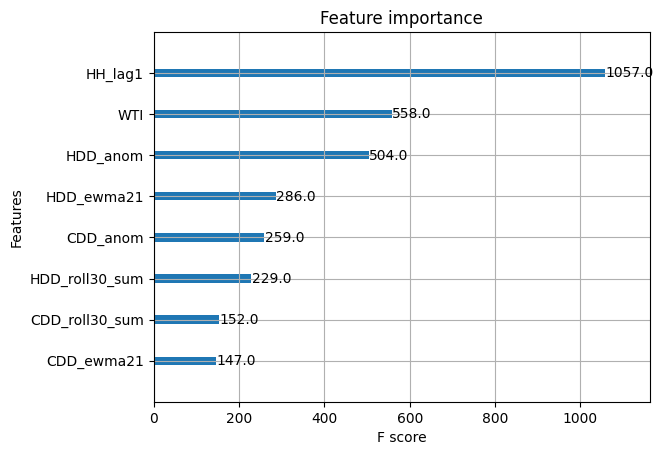

In [25]:
# 7) Feature importance

xgb.plot_importance(model, max_num_features=10)
plt.show()

In [28]:
#Comparisons

# Mean baseline
mean_pred = [y_train.mean()] * len(y_test)
rmse_mean = np.sqrt(mean_squared_error(y_test, mean_pred))

# Lag-1 baseline (assuming time order preserved)
lag_pred = y_test.shift(1).bfill()  # shift and fill first NaN
rmse_lag = np.sqrt(mean_squared_error(y_test, lag_pred))

print(f"XGBoost RMSE: {rmse_xgb:.4f}")
print(f"Mean Baseline RMSE: {rmse_mean:.4f}")
print(f"Lag-1 Baseline RMSE: {rmse_lag:.4f}")
print(f"y_test.std(): {y_test.std():.4f}")


XGBoost RMSE: 0.6575
Mean Baseline RMSE: 2.1152
Lag-1 Baseline RMSE: 0.7485
y_test.std(): 1.9246


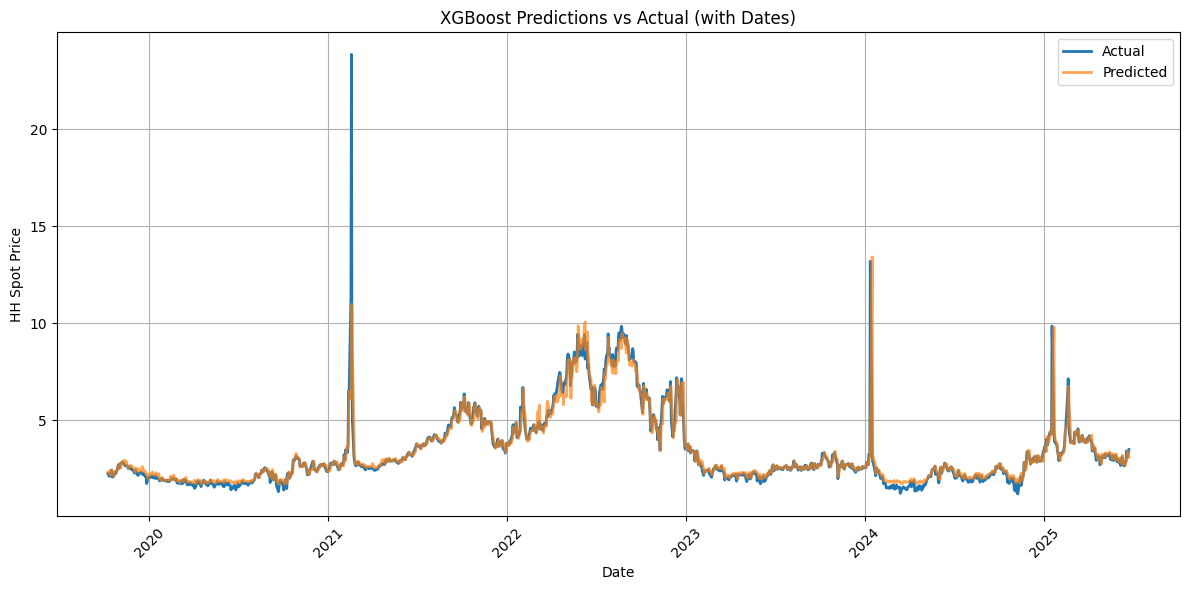

In [29]:

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linewidth=2, alpha=0.7)

plt.xlabel("Date")
plt.ylabel("HH Spot Price")
plt.title("XGBoost Predictions vs Actual (with Dates)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [35]:
latest_features = X.iloc[[-1]]# get last available features as DataFrame
next_day_pred = model.predict(latest_features)
latest_price = y.iloc[-1]
latest_date  = y.index[-1]
print(f"Predicted HH price for next day: {next_day_pred[0]:.4f}")
print(f"Latest actual HH price: {latest_price:.4f} on {latest_date.strftime('%Y-%m-%d')}")



Predicted HH price for next day: 3.1218
Latest actual HH price: 3.5000 on 2025-06-23


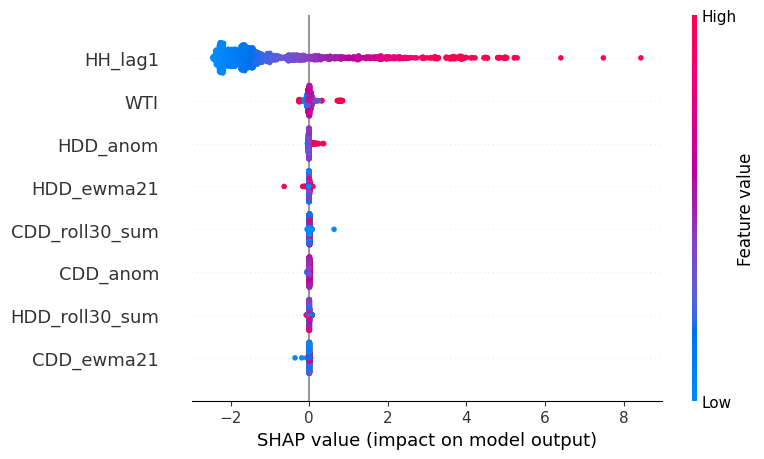

In [41]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Global importance
shap.summary_plot(shap_values, X_test)




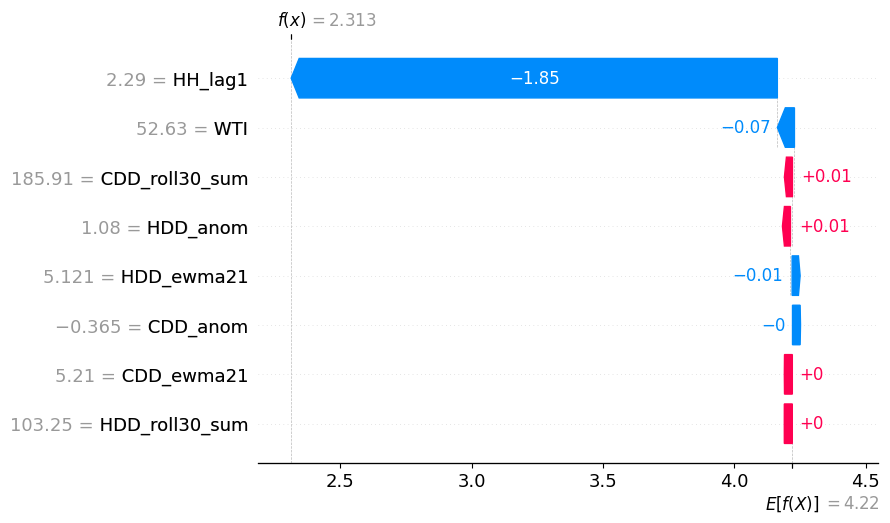

In [ ]:
#single prediction
shap.plots.waterfall(shap_values[0])

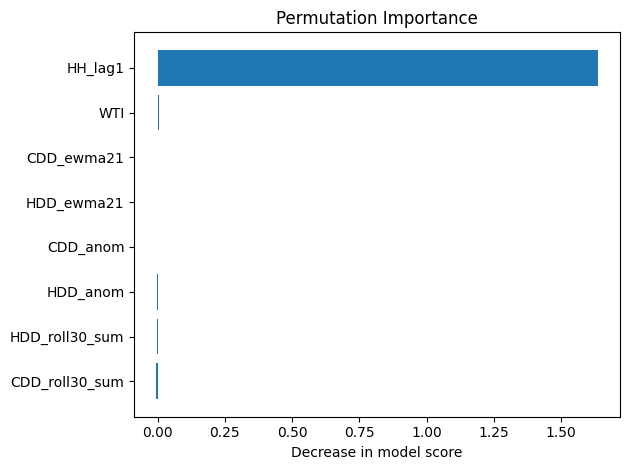

In [37]:
from sklearn.inspection import permutation_importance

perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Plot
import matplotlib.pyplot as plt
import numpy as np

sorted_idx = perm_result.importances_mean.argsort()
plt.barh(np.array(X_test.columns)[sorted_idx], perm_result.importances_mean[sorted_idx])
plt.title("Permutation Importance")
plt.xlabel("Decrease in model score")
plt.tight_layout()
plt.show()
